In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/house/train.csv')
df1 = pd.read_csv('data/house/test.csv')

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
df.shape, df1.shape

((1460, 81), (1459, 80))

In [11]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [12]:
na = df.isna().sum()/len(df)

In [13]:
na[na>.50]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [14]:
df = df.drop(columns=['PoolQC','Id','Alley','Fence','MiscFeature'])
df1 = df1.drop(columns=['PoolQC','Id','Alley','Fence','MiscFeature'])

In [15]:
obj = df.select_dtypes(include='object').columns

<AxesSubplot:>

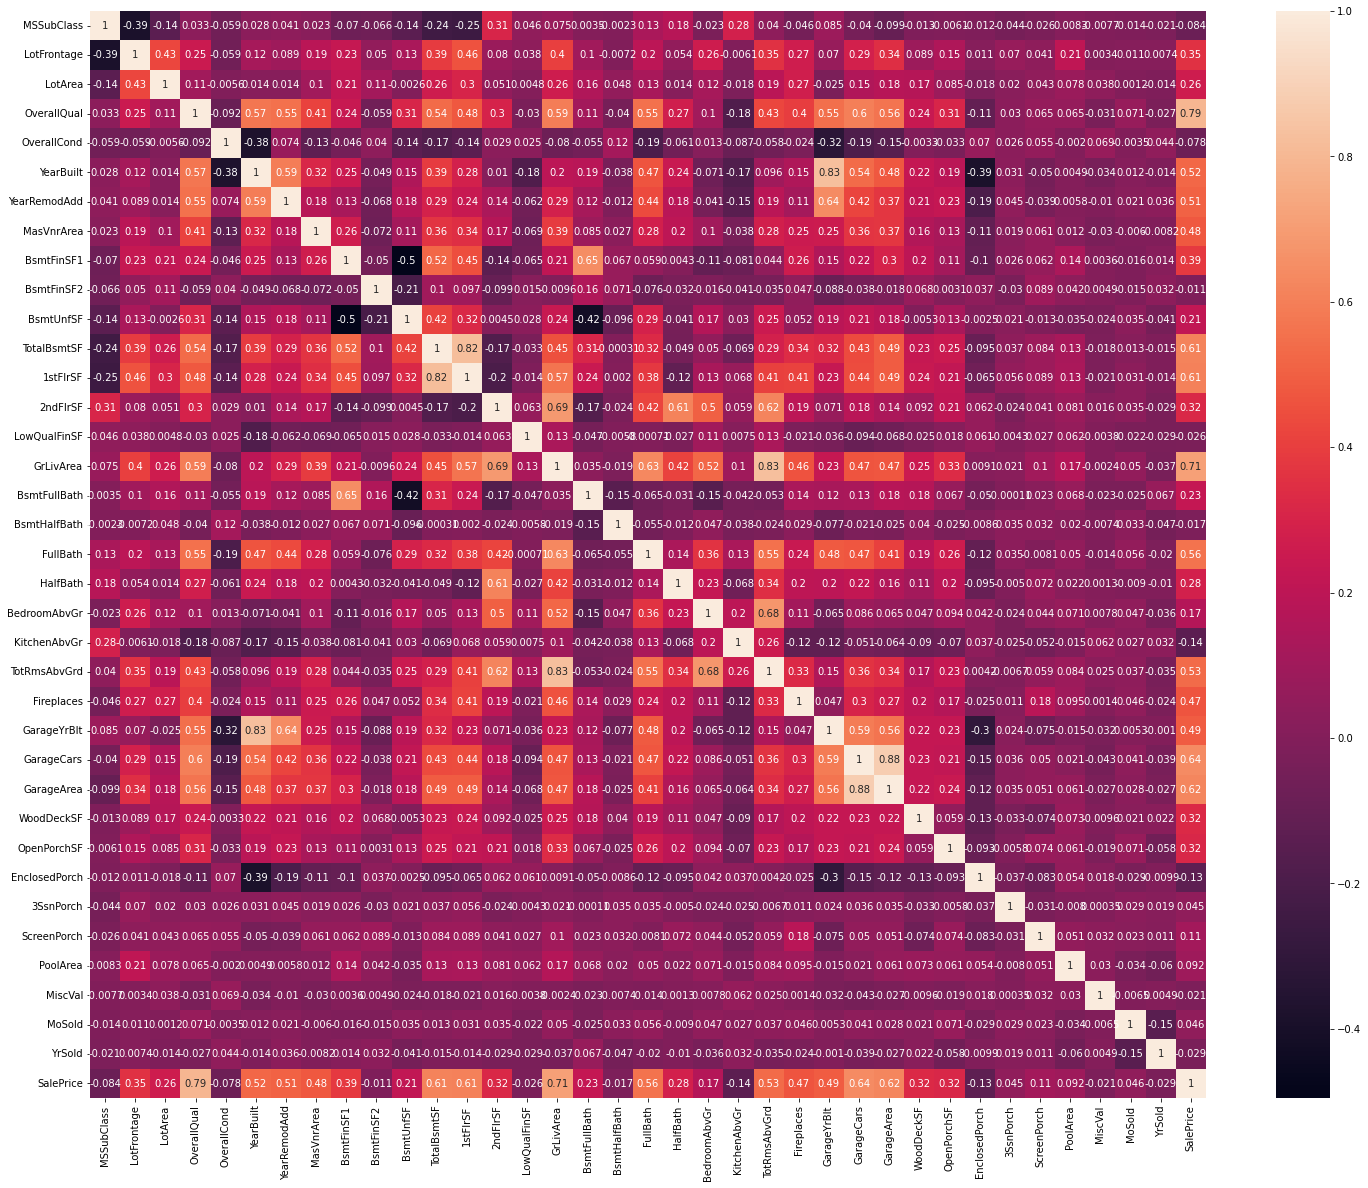

In [16]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [18]:
for i in obj:
    df[i] = df[i].fillna('aaaaaaaa')
    df[i] = df[i].astype(str)

In [20]:
for i in obj:
    df[i]= label_encoder.fit_transform(df[i])
    df1[i]= label_encoder.fit_transform(df1[i])

In [21]:
for i in df.select_dtypes(include='object').columns:
    print('____________________________________________________')
    print(i,df[i].nunique())

In [24]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')

In [25]:
df = pd.DataFrame(imp.fit_transform(df),columns=list(df.columns))
df1 = pd.DataFrame(imp.fit_transform(df1),columns=list(df1.columns))

In [26]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,0.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3.0,62.0,7917.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,20.0,3.0,85.0,13175.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,70.0,3.0,66.0,9042.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8.0,4.0,266500.0
1458,20.0,3.0,68.0,9717.0,1.0,3.0,3.0,0.0,4.0,0.0,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8.0,4.0,142125.0


In [27]:
model = CatBoostRegressor(verbose=False)
#model = XGBRegressor()

In [28]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
model.fit(X_train,y_train)
#model.fit(X_train,y_train,verbose=False)
model.score(X_train,y_train)

0.9949569634367867

In [31]:
model.score(X_test,y_test)

0.9090521568400034

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.1297061910610941

In [34]:
model.fit(X,y,verbose=False)
model.score(X,y)

0.9937172762628784

In [35]:
y_pred = model.predict(df1)

In [36]:
sub = pd.DataFrame({'id':range(1461,1461+len(df1)),'SalePrice':y_pred})
sub.to_csv('submission.csv',index=False)